First, we need to import the libraries required to explore and build visualization for our dataset.




#**Exploratory Analysis and Data Visualizations**

First, we need to import the libraries.

In [ ]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#recurrent neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed


Next, we need to load the data.

In [ ]:
df2 = pd.read_csv("isin=NL0014559478.csv")
df3 = pd.read_csv("isin=FR0014003FE9.csv")

x_train = pd.concat([df2, df3])


In [ ]:
df2 = pd.read_csv("tisin=NL0014559478.csv")
df3 = pd.read_csv("tisin=FR0014003FE9.csv")

x_test = pd.concat([df2, df3])

Let's look at the head of our x_train in our training data to look out our features in our dataset.

In [ ]:
x_train.head()

,order_id_unique,date_time,sequence_number,event_type,order_type,passive_or_aggressive_indicator,direction,price,quantity,transaction_price,traded_quantity,l1_ask_price,l1_ask_size,l1_bid_price,l1_bid_size,Trade,trad_sess_date
0,NL0014559478_9428879713_2021-06-07,2021-06-07T09:00:30.041+02:00,19504110,NEWO,Limit,NaN,S,13.405,1000.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07
1,NL0014559478_9126889826_2021-06-08,2021-06-08T09:00:32.374+02:00,21866650,REME,Limit,NaN,B,13.215,936.0,0.0,0.0,13.240,41.0,13.215,936.0,False,2021-06-08
2,NL0014559478_9445656929_2021-06-07,2021-06-07T09:00:30.042+02:00,19504111,NEWO,Limit,NaN,S,13.590,836.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07
3,NL0014559478_9009449314_2021-06-08,2021-06-08T09:00:32.374+02:00,21866651,CAME,Limit,NaN,B,13.210,300.0,0.0,0.0,13.240,41.0,13.215,936.0,False,2021-06-08
4,NL0014559478_9462434145_2021-06-07,2021-06-07T09:00:30.117+02:00,19504112,NEWO,Limit,NaN,S,13.410,1000.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07


Let's look at the head of y_train to look at values of target variables in our dataset.

Let's look at the shape of x_train in our training data.

In [ ]:
print(x_train.shape)

(753271, 17)


Below are the statistical distriubtions of our features in our datset.

In [ ]:
print(x_train.describe())

       sequence_number          price       quantity  transaction_price  \
count     7.532710e+05  753271.000000  753271.000000      753271.000000   
mean      2.224587e+07      12.756225     418.749149           1.681556   
std       3.909248e+06       1.975262     957.782788           4.330247   
min       1.699021e+07       0.000000       0.000000           0.000000   
25%       1.981270e+07      12.065000      84.000000           0.000000   
50%       2.142054e+07      12.440000     247.000000           0.000000   
75%       2.370515e+07      13.300000     456.000000           0.000000   
max       3.333783e+07      74.700000  100000.000000          16.598000   

       traded_quantity   l1_ask_price    l1_ask_size   l1_bid_price  \
count    753271.000000  753243.000000  753243.000000  753243.000000   
mean         23.591776      12.949529     536.352406      12.913103   
std         137.260944       1.265978    1043.998806       1.226054   
min           0.000000       7.750000   

Below are the datatypes of the features in our dataset, along with the counts, and to make sure the features are not null:

In [ ]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753271 entries, 0 to 141574
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   order_id_unique                  753271 non-null  object 
 1   date_time                        753271 non-null  object 
 2   sequence_number                  753271 non-null  int64  
 3   event_type                       753271 non-null  object 
 4   order_type                       753271 non-null  object 
 5   passive_or_aggressive_indicator  99299 non-null   object 
 6   direction                        753271 non-null  object 
 7   price                            753271 non-null  float64
 8   quantity                         753271 non-null  float64
 9   transaction_price                753271 non-null  float64
 10  traded_quantity                  753271 non-null  float64
 11  l1_ask_price                     753243 non-null  float64
 12  l1

# Cleaning

In this section, we will be preparing and cleaning our data so that we can properly use it.

In [ ]:
x_train.duplicated().sum()

0

In [ ]:
x_train.rename(columns = {"l1_ask_price" : "best_ask_price"}, inplace = True)
x_train.rename(columns = {"l1_ask_size" : "total_quantity_sold_bap"}, inplace = True)
x_train.rename(columns = {"l1_bid_price" : "best_bid_price"}, inplace = True)
x_train.rename(columns = {"l1_bid_size" : "total_quantity_sold_bp"}, inplace = True)


In [ ]:
#same process for x test
x_test.rename(columns = {"l1_ask_price" : "best_ask_price"}, inplace = True)
x_test.rename(columns = {"l1_ask_size" : "total_quantity_sold_bap"}, inplace = True)
x_test.rename(columns = {"l1_bid_price" : "best_bid_price"}, inplace = True)
x_test.rename(columns = {"l1_bid_size" : "total_quantity_sold_bp"}, inplace = True)

Renaming certain columns so that they are easier to access and read.

In [ ]:
print(x_train.isnull().mean())

order_id_unique                    0.000000
date_time                          0.000000
sequence_number                    0.000000
event_type                         0.000000
order_type                         0.000000
passive_or_aggressive_indicator    0.868176
direction                          0.000000
price                              0.000000
quantity                           0.000000
transaction_price                  0.000000
traded_quantity                    0.000000
best_ask_price                     0.000037
total_quantity_sold_bap            0.000037
best_bid_price                     0.000037
total_quantity_sold_bp             0.000037
Trade                              0.000000
trad_sess_date                     0.000000
dtype: float64


Checking the distribution of null values in the dataset, here we can see that obviously the passive_or_aggressive_indicator has the highest amount of null values. This indicates that there are few variables with parf/fill in this dataset.

In [ ]:
x_train_new = x_train.drop("order_type", axis = 1)
x_test_new = x_train.drop("order_type", axis = 1)

Dropping the order_type variable since it is not needed.

In [ ]:
print(x_train.isnull().sum())

order_id_unique                         0
date_time                               0
sequence_number                         0
event_type                              0
order_type                              0
passive_or_aggressive_indicator    653972
direction                               0
price                                   0
quantity                                0
transaction_price                       0
traded_quantity                         0
best_ask_price                         28
total_quantity_sold_bap                28
best_bid_price                         28
total_quantity_sold_bp                 28
Trade                                   0
trad_sess_date                          0
dtype: int64


In [ ]:
x_train_new = x_train_new.dropna(axis = 0)
x_test_new = x_train_new.dropna(axis = 0)

In [ ]:
x_train_new.head(10)

,order_id_unique,date_time,sequence_number,event_type,passive_or_aggressive_indicator,direction,price,quantity,transaction_price,traded_quantity,best_ask_price,total_quantity_sold_bap,best_bid_price,total_quantity_sold_bp,Trade,trad_sess_date
9,NL0014559478_9479211362_2021-06-08,2021-06-08T09:00:32.374+02:00,21866656,PARF,AGRE,B,13.240,1.0,13.240,40.0,13.240,41.0,13.240,1.0,True,2021-06-08
11,NL0014559478_8724236642_2021-06-08,2021-06-08T09:00:32.374+02:00,21866657,FILL,PASV,S,13.240,0.0,13.240,40.0,13.240,1.0,13.240,1.0,True,2021-06-08
13,NL0014559478_9479211362_2021-06-08,2021-06-08T09:00:32.374+02:00,21866658,FILL,AGRE,B,13.240,0.0,13.240,1.0,13.240,1.0,13.215,936.0,True,2021-06-08
15,NL0014559478_9344993634_2021-06-08,2021-06-08T09:00:32.374+02:00,21866659,FILL,PASV,S,13.240,0.0,13.240,1.0,13.275,803.0,13.215,936.0,True,2021-06-08
22,NL0014559478_5435902305_2021-06-07,2021-06-07T09:00:30.425+02:00,19504123,FILL,PASV,B,13.340,0.0,13.340,9.0,13.340,12.0,13.320,176.0,True,2021-06-07
24,NL0014559478_9546320225_2021-06-07,2021-06-07T09:00:30.425+02:00,19504124,PARF,AGRE,S,13.340,3.0,13.340,9.0,13.340,3.0,13.320,176.0,True,2021-06-07
51,NL0014559478_9630206306_2021-06-08,2021-06-08T09:00:32.378+02:00,21866706,FILL,PASV,B,13.230,0.0,13.230,300.0,13.230,300.0,13.210,936.0,True,2021-06-08
53,NL0014559478_9797978466_2021-06-08,2021-06-08T09:00:32.378+02:00,21866707,FILL,AGRE,S,13.230,0.0,13.230,300.0,13.270,300.0,13.210,936.0,True,2021-06-08
127,NL0014559478_10250963298_2021-06-08,2021-06-08T09:00:49.231+02:00,21866763,PARF,AGRE,S,13.200,584.0,13.230,416.0,13.200,584.0,13.215,300.0,True,2021-06-08
129,NL0014559478_9814755682_2021-06-08,2021-06-08T09:00:49.231+02:00,21866764,FILL,PASV,B,13.215,0.0,13.215,300.0,13.200,584.0,13.205,476.0,True,2021-06-08


In [ ]:
print(x_train_new.dtypes)

order_id_unique                     object
date_time                           object
sequence_number                      int64
event_type                          object
passive_or_aggressive_indicator     object
direction                           object
price                              float64
quantity                           float64
transaction_price                  float64
traded_quantity                    float64
best_ask_price                     float64
total_quantity_sold_bap            float64
best_bid_price                     float64
total_quantity_sold_bp             float64
Trade                                 bool
trad_sess_date                      object
dtype: object


Dropping any missing values from the dataset.

# Understanding the Variables

<Axes: >

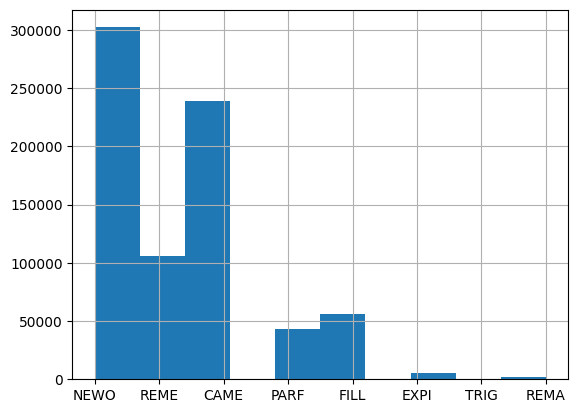

In [ ]:
x_train.event_type.hist()

Here we are looking at two different histograms, one containing all of the event types and the other containing only FILL and PARF. For the first one, NEWO is the most common, while in the second one FILL is the most common.

Text(0.5, 1.0, 'Quantity vs Passive_o')

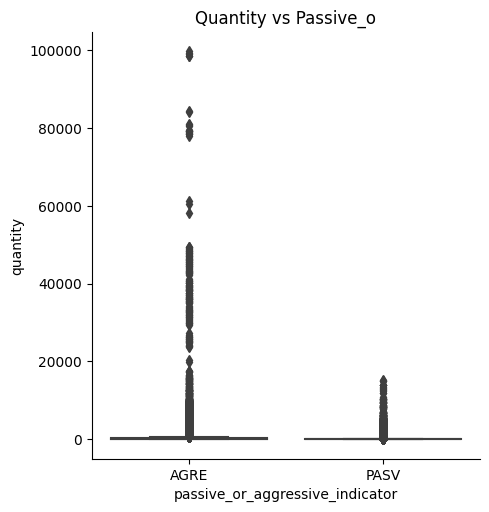

In [ ]:
sns.catplot(x = "passive_or_aggressive_indicator", y = "quantity", data = x_train, kind = "box", aspect = 1.0)
plt.title("Quantity vs Passive_o")

We dropped the 'Trade' variable from the correlation matrix as it is a boolean and does not appear to have any significant relationship with the other variables

<ipython-input-113-dcadecad256e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x_train_corr.corr()


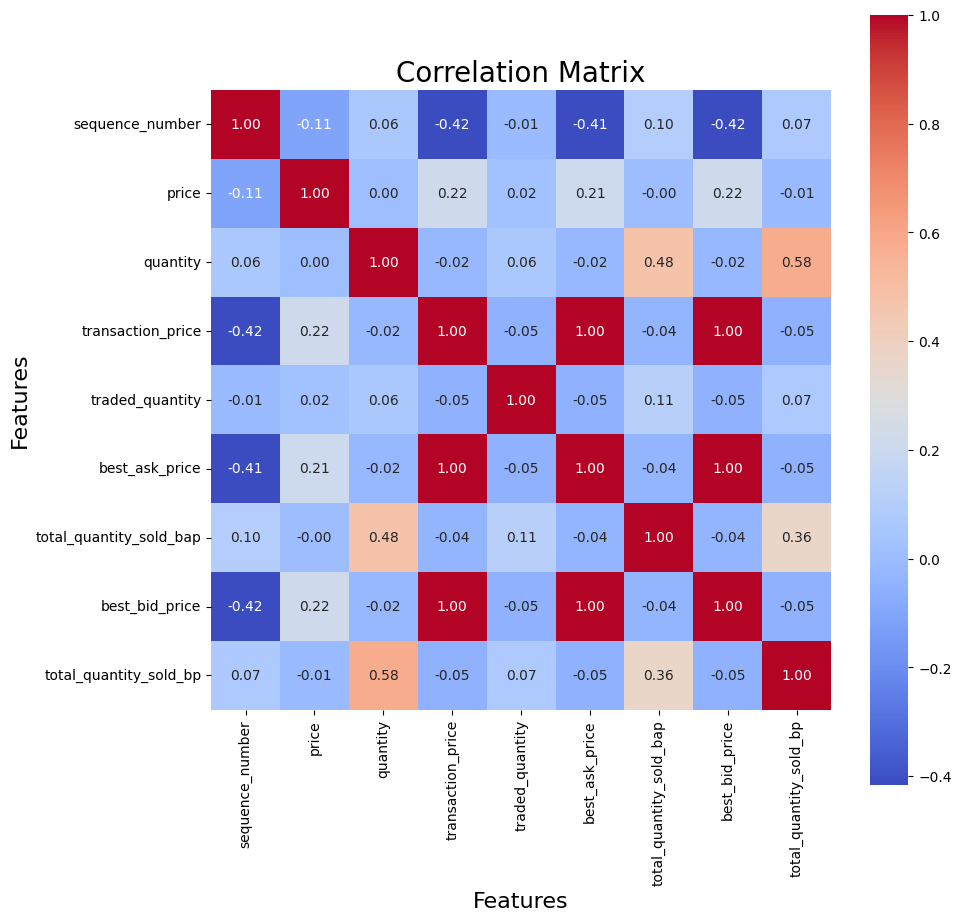

In [ ]:
x_train_corr = x_train_new.drop('Trade', axis=1)
corrmat = x_train_corr.corr()
# Create heatmap
plt.figure(figsize=(10,10))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=corrmat.columns,
                 xticklabels=corrmat.columns,
                 cmap="coolwarm")

# Set title and axis labels
plt.title("Correlation Matrix", fontsize=20)
plt.xlabel("Features", fontsize=16)
plt.ylabel("Features", fontsize=16)

# Show plot
plt.show()

Here, we have successfully created a correlation matrix.

# Individual bid prices vesus ask price



Generating Boxplots




Text(0.5, 1.0, 'Bidding price based on event types')

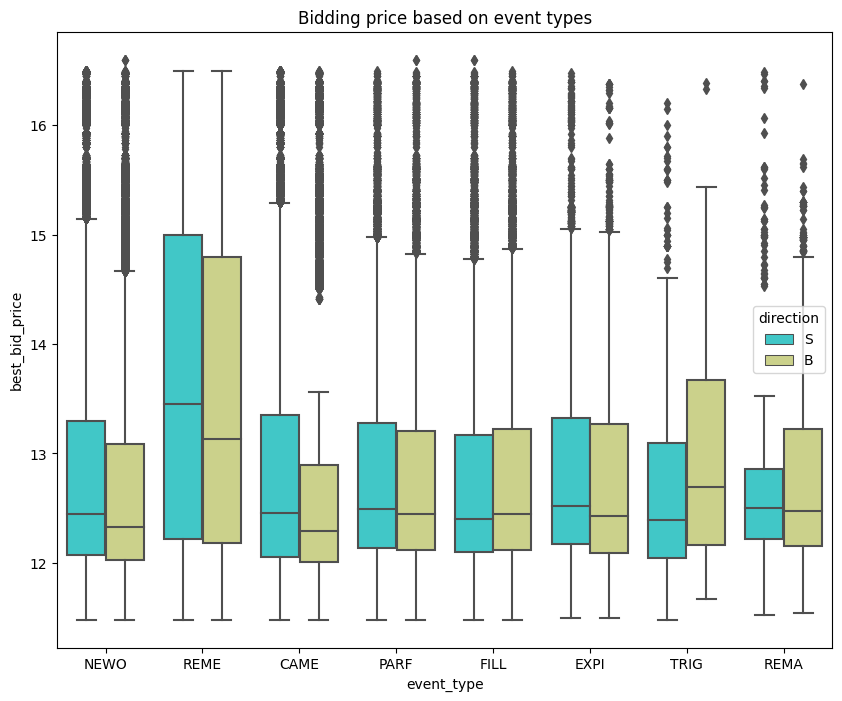

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='event_type',y='best_bid_price',data=x_train, palette='rainbow', hue='direction')
plt.title("Bidding price based on event types")

Based on the boxplot above "Bidding price based on event types" shows that the new submission (NEWO) event type contains some extreme outliers.


Text(0.5, 1.0, 'Asking price based on event types')

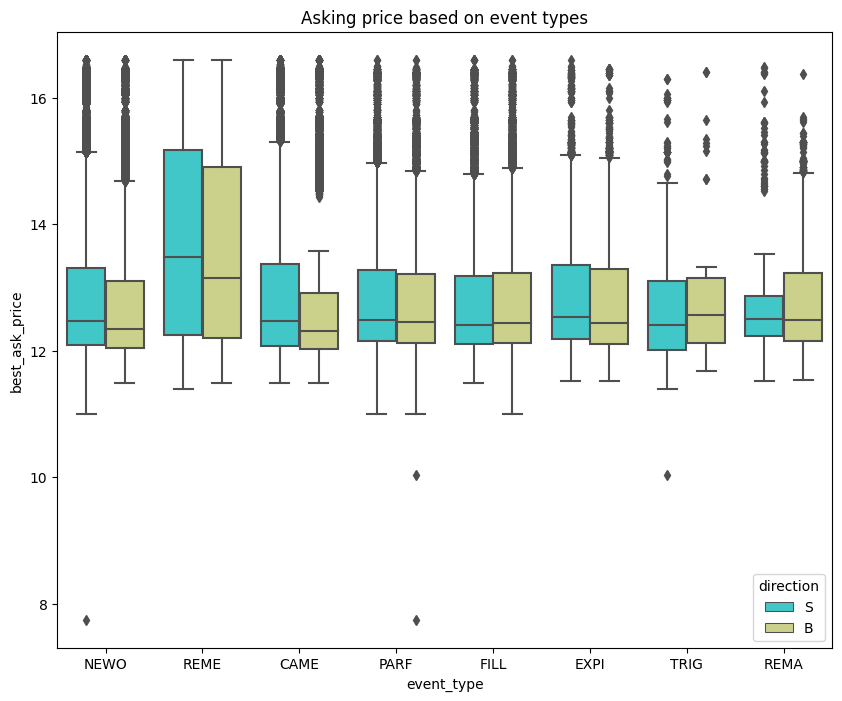

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='event_type',y='best_ask_price',data=x_train, palette='rainbow', hue='direction')
plt.title("Asking price based on event types")

Based on the boxplot above, which displays the asking price based on event types, it is evident that the new submission (NEWO) event type contains some outliers. However, these outliers are not as extreme as those observed in the bidding price event.
This suggests that the asking price for the new submission event may be more stable than the bidding price.

With this information, we can now compare the bidding and asking prices based on event types, side by side, while ignoring the outliers.
<br> It's important to note that outliers should be ignored in this analysis, as they can skew the results and provide an inaccurate representation of the market trends. Instead, we should focus on the central tendency of the data, which can be determined by generating boxplot

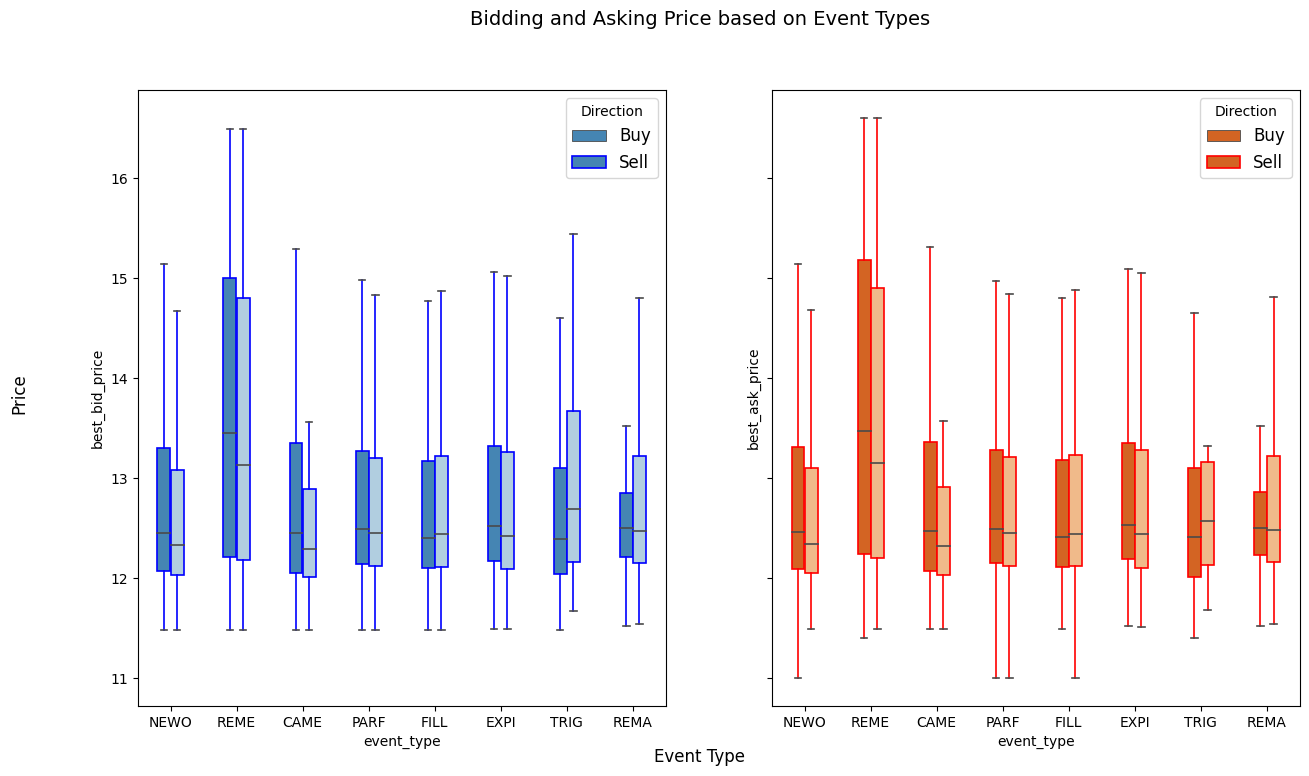

In [ ]:
# Create two separate boxplots for bid and ask prices
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8), sharey=True)

sns.boxplot(x='event_type', y='best_bid_price', data=x_train, palette='Blues_r', hue='direction', showfliers=False,
            width=0.4, saturation=0.8, linewidth=1.2, whiskerprops={'color': 'b'},
            boxprops=dict(edgecolor='b', linewidth=1.2),  ax=ax1)
ax1.legend(title='Direction', labels=['Buy', 'Sell'], fontsize=12, loc='upper right')

sns.boxplot(x='event_type', y='best_ask_price', data=x_train, palette='Oranges_r', hue='direction', showfliers=False,
            width=0.4, saturation=0.8, linewidth=1.2, whiskerprops={'color': 'r'},
            boxprops=dict(edgecolor='r', linewidth=1.2), ax=ax2)
ax2.legend(title='Direction', labels=['Buy', 'Sell'], fontsize=12, loc='upper right')

# Add a title and axis labels for the combined plot
fig.suptitle('Bidding and Asking Price based on Event Types', fontsize=14)
fig.text(0.5, 0.04, 'Event Type', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Price', va='center', rotation='vertical', fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()



#Preliminary Model Building

Linear Regression Model

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
import datetime
import dateutil.parser

# Convert the timestamp to Unix time
relevant_columns = ["date_time", "transaction_price", "quantity"]
transaction_data = x_train_new[relevant_columns]

for i, row in transaction_data.iterrows():
    timestamp_str = row['date_time']
    dt_obj = dateutil.parser.parse(timestamp_str)
    unix_time = int(dt_obj.timestamp())
    transaction_data.at[i, 'date_time'] = unix_time

print(transaction_data.head())

     date_time  transaction_price  quantity
9   1623135632              13.24       1.0
11  1623135632              13.24       0.0
13  1623135632              13.24       0.0
15  1623135632              13.24       0.0
22  1623049230              13.34       0.0


In [ ]:
# Split the data into input (X) and output (y) variables
X_t = transaction_data[["date_time"]]
y_t = transaction_data["transaction_price"]
# Fit a linear regression model to the data
model = LinearRegression().fit(X_t, y_t)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error (MSE) of the model on the training data
y_pred = model.predict(X_t)
mse = mean_squared_error(y_t, y_pred)

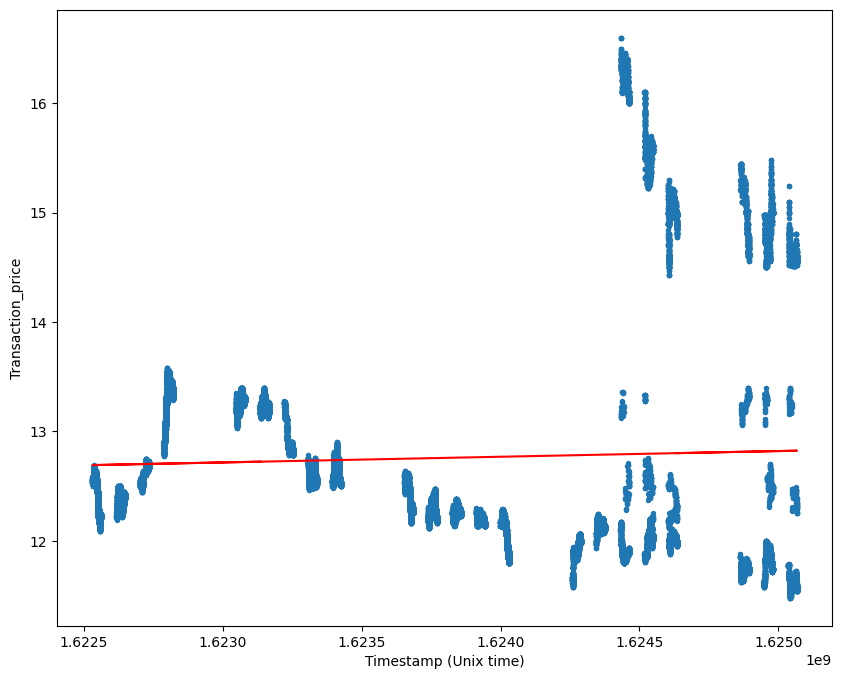

Mean squared error (MSE) on the training data: 0.98


In [ ]:
# Visualize the training data and the regression line
plt.figure(figsize=(10,8))
plt.scatter(X_t, y_t, s=8)
plt.plot(X_t, y_pred, color='r')
plt.xlabel('Timestamp (Unix time)')
plt.ylabel('Transaction_price')
plt.show()


print("Mean squared error (MSE) on the training data: {:.2f}".format(mse))

In [ ]:
# Convert the timestamp to Unix time
transaction_data_test = x_test_new[relevant_columns]

for i, row in transaction_data_test.iterrows():
    timestamp_str = row['date_time']
    dt_obj = dateutil.parser.parse(timestamp_str)
    unix_time = int(dt_obj.timestamp())
    transaction_data_test.at[i, 'date_time'] = unix_time

print(transaction_data_test.head())

     date_time  transaction_price  quantity
9   1623135632              13.24       1.0
11  1623135632              13.24       0.0
13  1623135632              13.24       0.0
15  1623135632              13.24       0.0
22  1623049230              13.34       0.0


In [ ]:
X_test = transaction_data_test[['date_time']]
y_test = transaction_data_test[['transaction_price']]
predicted_price = model.predict(transaction_data_test['date_time'].values.reshape(-1, 1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
actual_price = transaction_data_test['transaction_price'].values
residuals = actual_price - predicted_price
mean_res = np.mean(residuals)
std_res = np.std(residuals)
z_scores = (residuals - mean_res) / std_res
z_scores

array([0.52178679, 0.52178679, 0.52178679, ..., 1.99889614, 1.99283461,
       1.99283461])

In [ ]:
# Identify anomalies
threshold = 3
anomalies = transaction_data_test[np.abs(z_scores) > threshold]

In [ ]:
# Calculate MSE of model on test data
mse_test = mean_squared_error(y_test, predicted_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted_price)
r2 = r2_score(y_test, predicted_price)

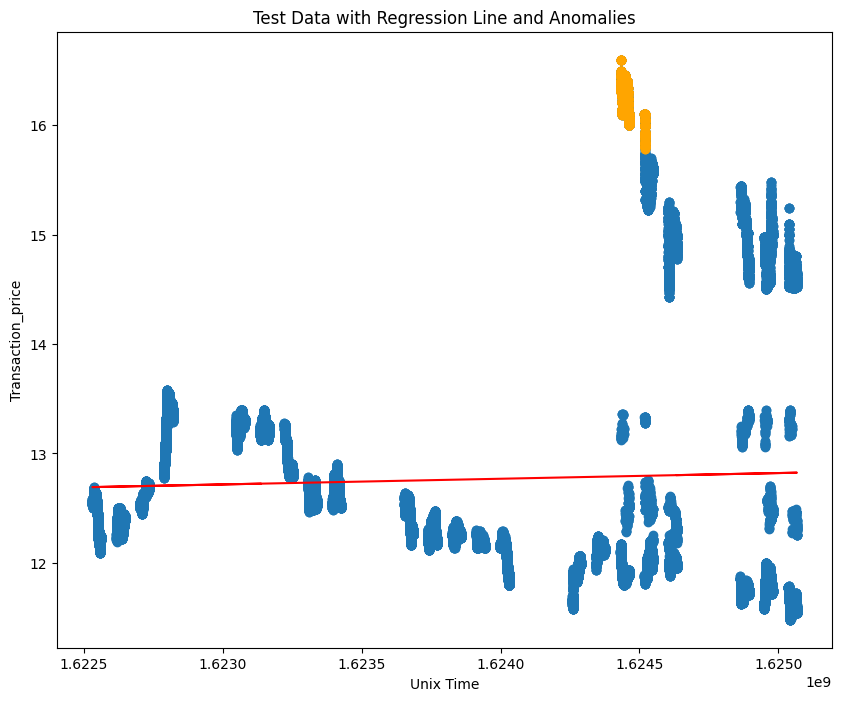

MSE on test data:  0.9797998653625739
RMSE: 0.9898484052432341
MAE: 0.7505763537688325
R-squared: 0.0018635493546470538


In [ ]:
# Visualize test data, regression line, and anomalies
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test)
plt.plot(X_test, predicted_price, color='red')
plt.scatter(anomalies['date_time'], anomalies['transaction_price'], color='orange')
plt.title('Test Data with Regression Line and Anomalies')
plt.xlabel('Unix Time')
plt.ylabel('Transaction_price')
plt.show()

print('MSE on test data: ', mse_test)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

##Time Series

In [ ]:
x_train_trans = x_train_new.dropna(subset=['passive_or_aggressive_indicator'])

# Get descriptive statistics for 'price' column
tran_price_stats = x_train_trans['transaction_price'].describe()

# Print the result
print(tran_price_stats)


count    99298.000000
mean        12.755500
std          0.990777
min         11.480000
25%         12.125000
50%         12.450000
75%         13.220000
max         16.598000
Name: transaction_price, dtype: float64


In [ ]:
x_train_trans.loc[(x_train_trans['transaction_price'] == 16.598000)]

,order_id_unique,date_time,sequence_number,event_type,passive_or_aggressive_indicator,direction,price,quantity,transaction_price,traded_quantity,best_ask_price,total_quantity_sold_bap,best_bid_price,total_quantity_sold_bp,Trade,trad_sess_date
187,FR0014003FE9_2768324977_2021-06-23,2021-06-23T09:05:59.976+02:00,20016536,FILL,AGRE,B,16.598,0.0,16.598,50.0,16.598,446.0,16.474,138.0,True,2021-06-23
191,FR0014003FE9_2516666737_2021-06-23,2021-06-23T09:05:59.976+02:00,20016537,PARF,PASV,S,16.598,60.0,16.598,50.0,16.598,396.0,16.474,138.0,True,2021-06-23
299,FR0014003FE9_3019983217_2021-06-23,2021-06-23T09:07:47.197+02:00,20016564,PARF,AGRE,B,16.600,300.0,16.598,60.0,16.598,425.0,16.600,300.0,True,2021-06-23
303,FR0014003FE9_2516666737_2021-06-23,2021-06-23T09:07:47.197+02:00,20016565,FILL,PASV,S,16.598,0.0,16.598,60.0,16.598,365.0,16.600,300.0,True,2021-06-23
307,FR0014003FE9_3019983217_2021-06-23,2021-06-23T09:07:47.197+02:00,20016566,PARF,AGRE,B,16.600,68.0,16.598,232.0,16.598,365.0,16.600,68.0,True,2021-06-23
311,FR0014003FE9_2566998385_2021-06-23,2021-06-23T09:07:47.197+02:00,20016567,FILL,PASV,S,16.598,0.0,16.598,232.0,16.598,133.0,16.600,68.0,True,2021-06-23
315,FR0014003FE9_3019983217_2021-06-23,2021-06-23T09:07:47.197+02:00,20016568,FILL,AGRE,B,16.600,0.0,16.598,68.0,16.598,133.0,16.476,113.0,True,2021-06-23
319,FR0014003FE9_2751547761_2021-06-23,2021-06-23T09:07:47.197+02:00,20016569,PARF,PASV,S,16.598,36.0,16.598,68.0,16.598,65.0,16.476,113.0,True,2021-06-23


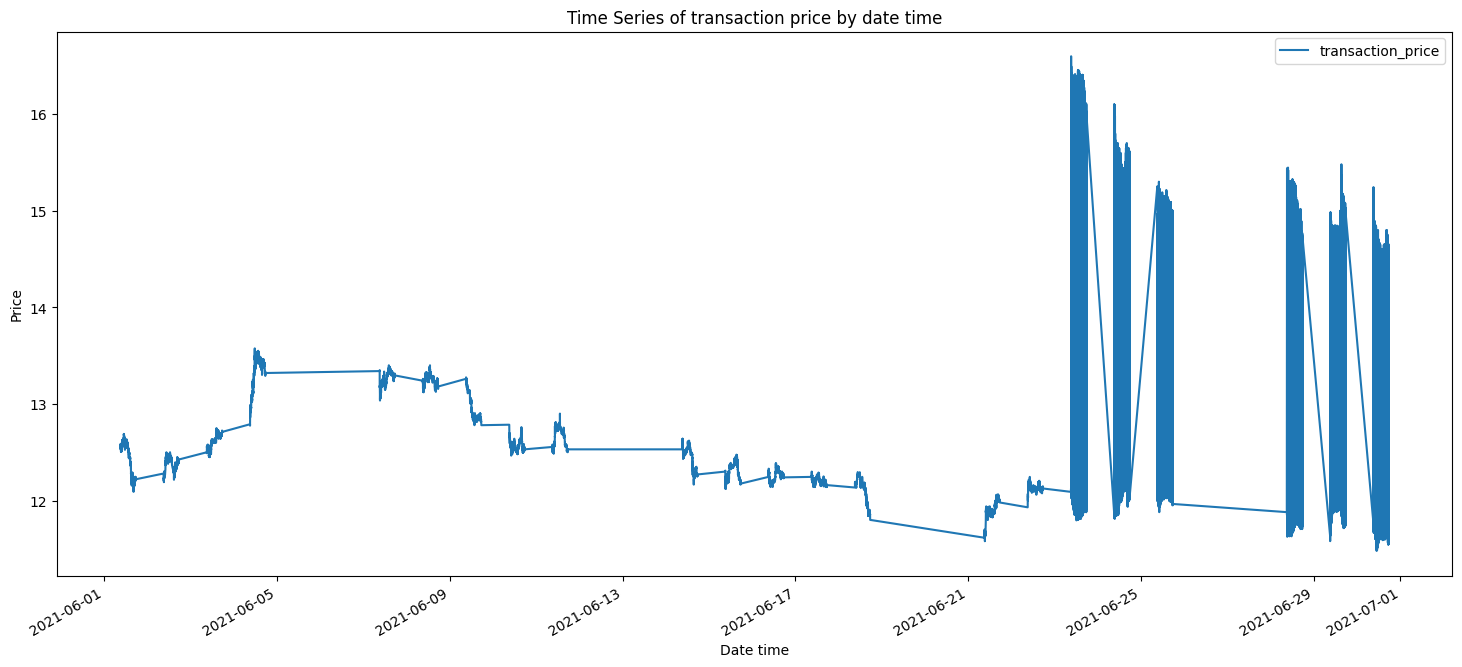

In [ ]:
x_train_trans['date_time'] = pd.to_datetime(x_train_trans['date_time'])
x_train_trans.plot(x='date_time', y='transaction_price', figsize=(18,8))
plt.xlabel('Date time')
plt.ylabel('Price')
plt.title('Time Series of transaction price by date time');

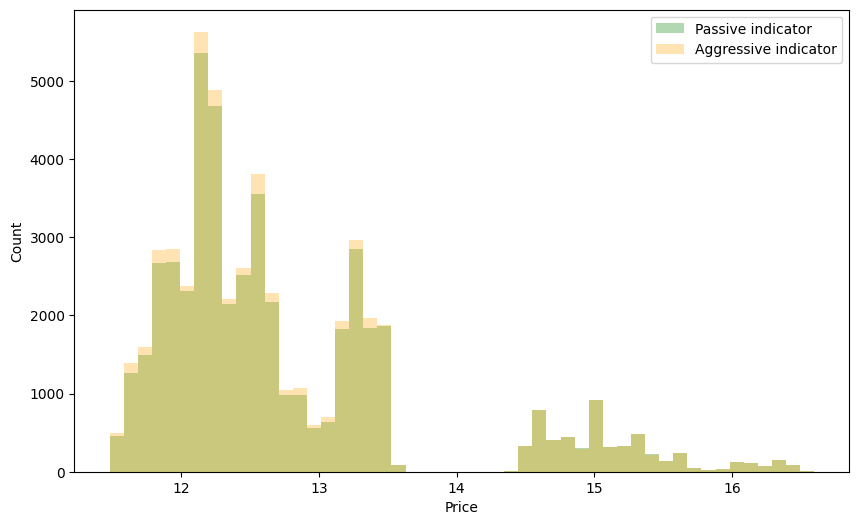

In [ ]:
a = x_train_trans.loc[x_train_trans['passive_or_aggressive_indicator'] == 'PASV', 'transaction_price']
b = x_train_trans.loc[x_train_trans['passive_or_aggressive_indicator'] == 'AGRE', 'transaction_price']
plt.figure(figsize=(10, 6))
plt.hist(a, bins=50, alpha=0.3, label='Passive indicator', color='green')
plt.hist(b, bins=50, alpha=0.3, label='Aggressive indicator', color='orange')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


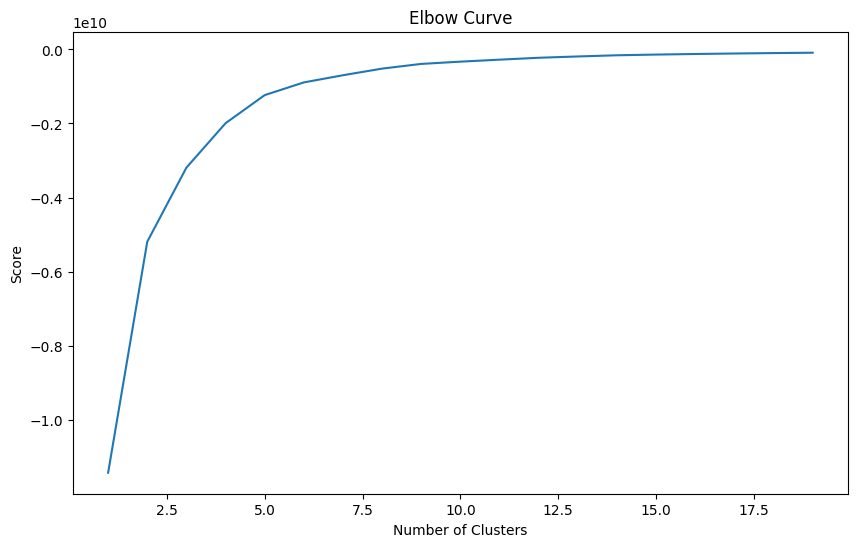

In [ ]:
x_train_trans['passive_or_aggressive_indicator'] = x_train_trans['passive_or_aggressive_indicator'].replace({'PASV': 1, 'AGRE': 0})
data = x_train_trans[['transaction_price', 'traded_quantity', 'passive_or_aggressive_indicator']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


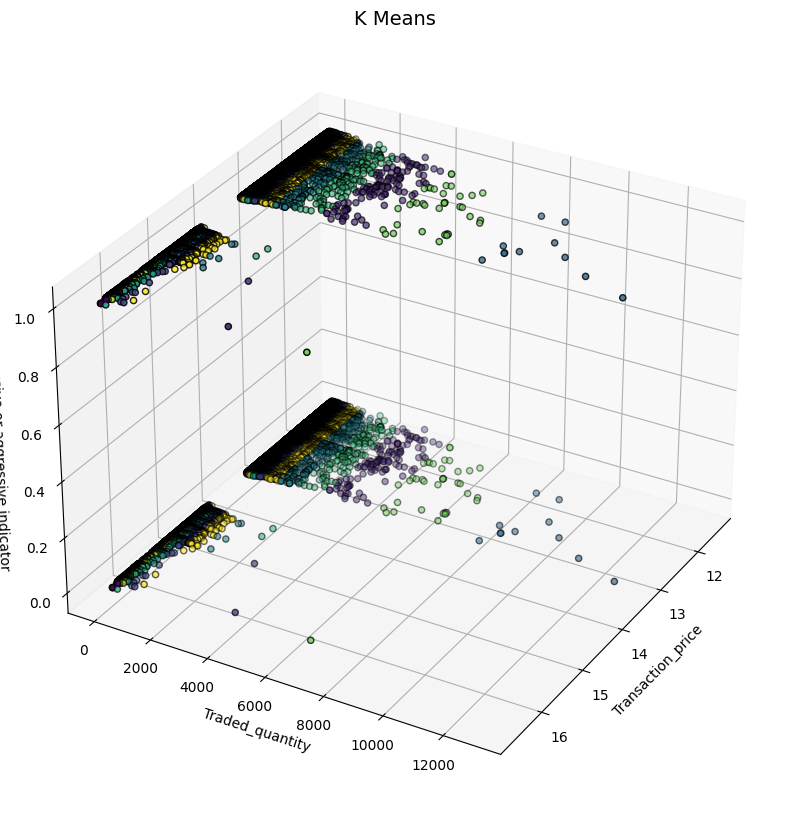

In [ ]:
X = x_train_trans[['transaction_price', 'traded_quantity', 'passive_or_aggressive_indicator']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_

#Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=30)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(float), edgecolor="k")
ax.set_xlabel("Transaction_price")
ax.set_ylabel("Traded_quantity")
ax.set_zlabel("passive or aggressive indicator")
plt.title("K Means", fontsize=14)
plt.show()



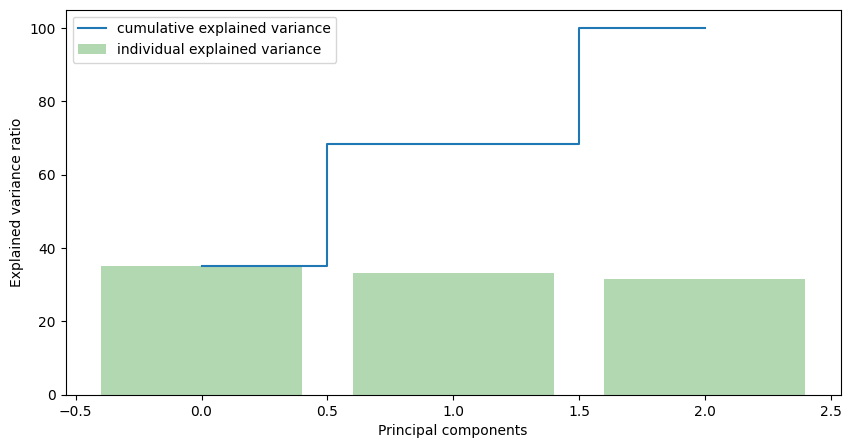

In [ ]:
data = x_train_trans[['transaction_price', 'traded_quantity', 'passive_or_aggressive_indicator']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [ ]:
distances = np.min(kmeans[9].transform(X), axis=1)
outliers_fraction = 0.01
number_of_outliers = int(len(distances) * outliers_fraction)
outlier_indices = np.argsort(distances)[-number_of_outliers:]
threshold = distances[outlier_indices].min()
x_train_trans['anomaly1'] = (distances >= threshold).astype(int)



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


                                                       order_id_unique  \
date_time                                                                
2021-06-07 09:02:02.888000+02:00   NL0014559478_11626695009_2021-06-07   
2021-06-08 09:02:39.521000+02:00   NL0014559478_11945462114_2021-06-08   
2021-06-08 09:04:36.049000+02:00   NL0014559478_11979016546_2021-06-08   
2021-06-08 09:04:46.358000+02:00   NL0014559478_10804611426_2021-06-08   
2021-06-08 09:04:46.365000+02:00    NL0014559478_3137423714_2021-06-08   
...                                                                ...   
2021-06-25 17:23:22.180000+02:00  FR0014003FE9_107223271795_2021-06-25   
2021-06-25 17:26:27.608000+02:00  FR0014003FE9_108682889587_2021-06-25   
2021-06-25 17:26:55.332000+02:00  FR0014003FE9_106669623667_2021-06-25   
2021-06-25 17:29:05.333000+02:00  FR0014003FE9_103347734899_2021-06-25   
2021-06-25 17:29:09.873000+02:00  FR0014003FE9_110410942835_2021-06-25   

                                  seq

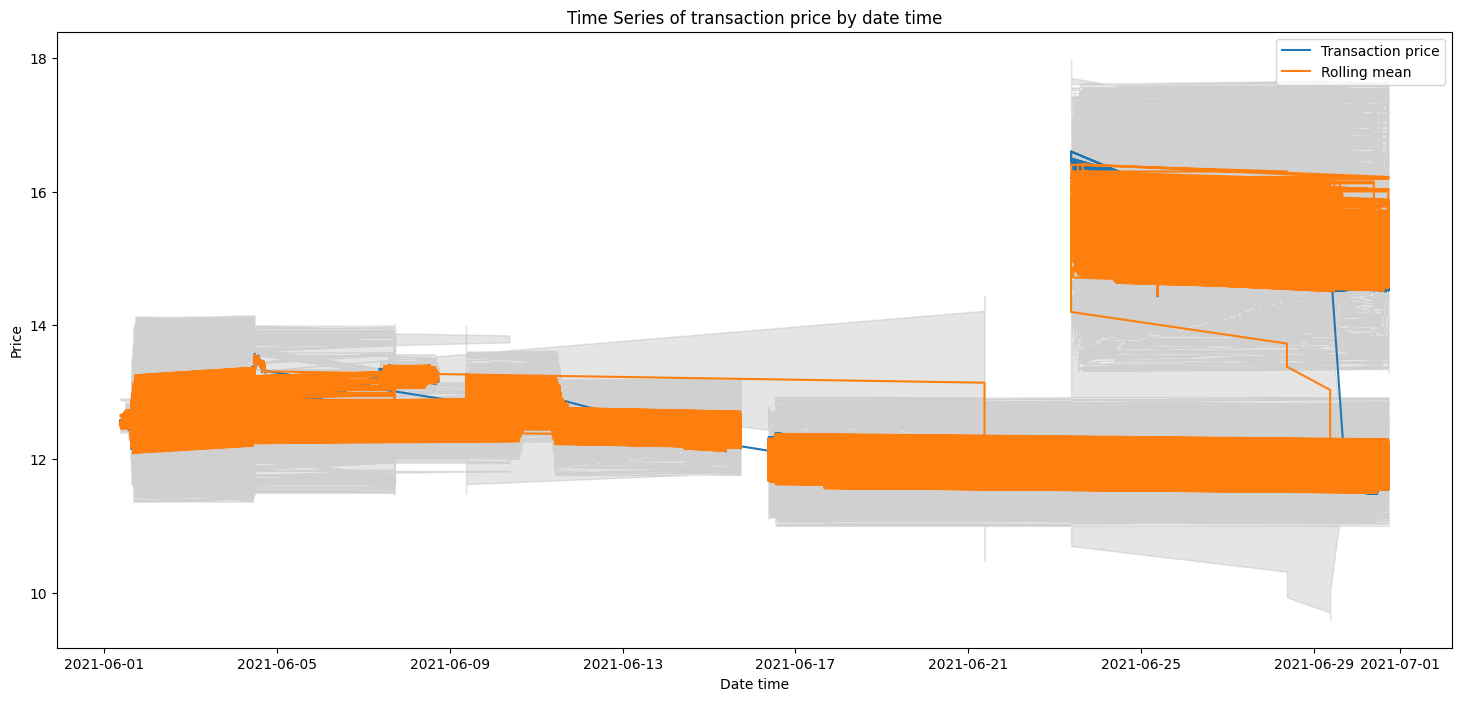

In [ ]:
# Convert date_time column to datetime format and set it as the index
x_train_trans['date_time'] = pd.to_datetime(x_train_trans['date_time'])
x_train_trans.set_index('date_time', inplace=True)

# Calculate the rolling mean and standard deviation of transaction_price
rolling_mean = x_train_trans['transaction_price'].rolling(window=10).mean()
rolling_std = x_train_trans['transaction_price'].rolling(window=10).std()

# Create upper and lower bounds based on rolling mean and standard deviation
upper_bound = rolling_mean + 2 * rolling_std
lower_bound = rolling_mean - 2 * rolling_std

# Plot the data and boundaries
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(x_train_trans.index, x_train_trans['transaction_price'], label='Transaction price')
ax.plot(rolling_mean.index, rolling_mean, label='Rolling mean')
ax.fill_between(rolling_std.index, upper_bound, lower_bound, alpha=0.2, color='grey')
ax.legend()
plt.xlabel('Date time')
plt.ylabel('Price')
plt.title('Time Series of transaction price by date time');

# Identify anomalies as points that fall outside of the bounds
anomalies = x_train_trans[(x_train_trans['transaction_price'] > upper_bound) | (x_train_trans['transaction_price'] < lower_bound)]
print(anomalies)


In [ ]:
from sklearn.ensemble import IsolationForest

# Create an isolation forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

# Fit the model to the training data
model.fit(x_train_trans[['transaction_price']])

# Predict the anomalies in the training data
x_train_trans['anomaly'] = model.predict(x_train_trans[['transaction_price']])

# Print the number of anomalies detected
print("Number of anomalies detected:", sum(x_train_trans['anomaly'] == -1))


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of anomalies detected: 9658



#Random Forrest

In [ ]:
# Convert timestamp to datetime
x_train_new['date_time'] = pd.to_datetime(x_train_new['date_time'])
x_test_new['date_time'] = pd.to_datetime(x_test_new['date_time'])

x_train_new['trad_sess_date'] = pd.to_datetime(x_train_new['trad_sess_date'])
x_test_new['trad_sess_date'] = pd.to_datetime(x_test_new['trad_sess_date'])


In [ ]:

# Add 'turnover' column
x_train_new['turnover'] = x_train_new['transaction_price'] * x_train_new['quantity']
x_test_new['turnover'] = x_test_new['transaction_price'] * x_test_new['quantity']

# Add 'mid_price' column
x_train_new['mid_price'] = (x_train_new['best_ask_price'] + x_train_new['best_bid_price']) / 2
x_test_new['mid_price'] = (x_test_new['best_ask_price'] + x_test_new['best_bid_price']) / 2

# Add 'market_depth' column
x_train_new['market_depth'] = x_train_new['total_quantity_sold_bap'] + x_train_new['total_quantity_sold_bp']
x_test_new['market_depth'] = x_test_new['total_quantity_sold_bap'] + x_test_new['total_quantity_sold_bp']


In [ ]:
train_feature = x_train_new.select_dtypes(include=[np.number]).drop(['transaction_price'], axis=1)
test_feature = x_test_new.select_dtypes(include=[np.number]).drop(['transaction_price'], axis=1)

train_label = x_train_new['transaction_price']
test_label = x_test_new['transaction_price']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_feature, train_label)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the model
y_pred = rf.predict(test_feature)
mse = mean_squared_error(test_label, y_pred, squared=False)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, y_pred)
r2 = r2_score(test_label, y_pred)

print('Mean Squared Error:', mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.002935199907922151
RMSE: 0.054177485249152633
MAE: 0.00038548570969245083
R-squared: 0.999991223367564


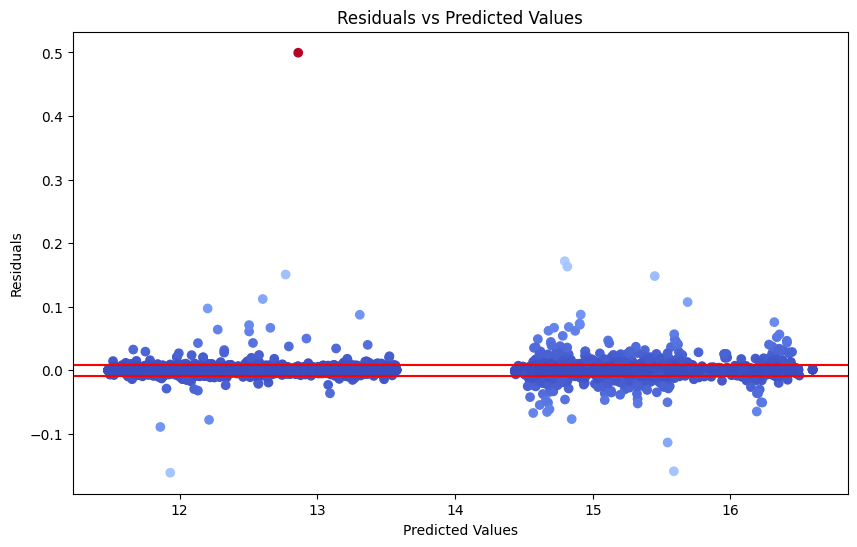

In [ ]:
import statsmodels.api as sm

# Compute the residuals
y_pred = rf.predict(test_feature)
residuals = test_label - y_pred

# Compute the z-scores
std_dev = residuals.std()
z_scores = abs(residuals) / std_dev

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_pred, residuals, c=z_scores, cmap='coolwarm')
ax.axhline(y=3*std_dev, color='r', linestyle='-')
ax.axhline(y=-3*std_dev, color='r', linestyle='-')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Predicted Values')
plt.show()


**bold text**# Exploratory Analysis and Data Visualizations

First, we need to import the libraries.

In [ ]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#recurrent neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed


Next, we need to load the data.

In [ ]:
#x_train = pd.read_csv("isin=FR0000031122.csv")
#df1 = pd.read_csv("isin=FR0000120685.csv")
df2 = pd.read_csv("isin=NL0014559478.csv")
df3 = pd.read_csv("isin=FR0014003FE9.csv")

x_train = pd.concat([df2, df3])
y_train = pd.read_csv("y_train_file_clean_T9wvbDT.csv")




In [ ]:
#test data
#df1 = pd.read_csv("tisin=FR0000120685.csv")
df2 = pd.read_csv("tisin=NL0014559478.csv")
df3 = pd.read_csv("tisin=FR0014003FE9.csv")

x_test = pd.concat([df2, df3])

Let's look at the head of our x_train in our training data to look out our features in our dataset.

In [ ]:
x_train.head()

,order_id_unique,date_time,sequence_number,event_type,order_type,passive_or_aggressive_indicator,direction,price,quantity,transaction_price,traded_quantity,l1_ask_price,l1_ask_size,l1_bid_price,l1_bid_size,Trade,trad_sess_date
0,NL0014559478_9428879713_2021-06-07,2021-06-07T09:00:30.041+02:00,19504110,NEWO,Limit,NaN,S,13.405,1000.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07
1,NL0014559478_9126889826_2021-06-08,2021-06-08T09:00:32.374+02:00,21866650,REME,Limit,NaN,B,13.215,936.0,0.0,0.0,13.240,41.0,13.215,936.0,False,2021-06-08
2,NL0014559478_9445656929_2021-06-07,2021-06-07T09:00:30.042+02:00,19504111,NEWO,Limit,NaN,S,13.590,836.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07
3,NL0014559478_9009449314_2021-06-08,2021-06-08T09:00:32.374+02:00,21866651,CAME,Limit,NaN,B,13.210,300.0,0.0,0.0,13.240,41.0,13.215,936.0,False,2021-06-08
4,NL0014559478_9462434145_2021-06-07,2021-06-07T09:00:30.117+02:00,19504112,NEWO,Limit,NaN,S,13.410,1000.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07


Let's look at the head of y_train to look at values of target variables in our dataset.

In [ ]:
y_train.head()

,Unnamed: 0,index_unique,isin,trad_sess_date,schedule,Event
0,0,FR0000031122_01/06/2021_10H - 11H,FR0000031122,01/06/2021,10H - 11H,False
1,1,FR0000031122_01/06/2021_11H - 12H,FR0000031122,01/06/2021,11H - 12H,False
2,2,FR0000031122_01/06/2021_12H - 13H,FR0000031122,01/06/2021,12H - 13H,False
3,3,FR0000031122_01/06/2021_13H - 14H,FR0000031122,01/06/2021,13H - 14H,False
4,4,FR0000031122_01/06/2021_14H - 15H,FR0000031122,01/06/2021,14H - 15H,False


Let's look at the shape of x_train in our training data.

In [ ]:
print(x_train.shape)

(753271, 17)


Below are the statistical distriubtions of our features in our datset.

In [ ]:
print(x_train.describe())

       sequence_number          price       quantity  transaction_price  \
count     7.532710e+05  753271.000000  753271.000000      753271.000000   
mean      2.224587e+07      12.756225     418.749149           1.681556   
std       3.909248e+06       1.975262     957.782788           4.330247   
min       1.699021e+07       0.000000       0.000000           0.000000   
25%       1.981270e+07      12.065000      84.000000           0.000000   
50%       2.142054e+07      12.440000     247.000000           0.000000   
75%       2.370515e+07      13.300000     456.000000           0.000000   
max       3.333783e+07      74.700000  100000.000000          16.598000   

       traded_quantity   l1_ask_price    l1_ask_size   l1_bid_price  \
count    753271.000000  753243.000000  753243.000000  753243.000000   
mean         23.591776      12.949529     536.352406      12.913103   
std         137.260944       1.265978    1043.998806       1.226054   
min           0.000000       7.750000   

Below are the datatypes of the features in our dataset, along with the counts, and to make sure the features are not null:

In [ ]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753271 entries, 0 to 141574
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   order_id_unique                  753271 non-null  object 
 1   date_time                        753271 non-null  object 
 2   sequence_number                  753271 non-null  int64  
 3   event_type                       753271 non-null  object 
 4   order_type                       753271 non-null  object 
 5   passive_or_aggressive_indicator  99299 non-null   object 
 6   direction                        753271 non-null  object 
 7   price                            753271 non-null  float64
 8   quantity                         753271 non-null  float64
 9   transaction_price                753271 non-null  float64
 10  traded_quantity                  753271 non-null  float64
 11  l1_ask_price                     753243 non-null  float64
 12  l1

# Autoencoder

Libraries to import

In [ ]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#recurrent neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

LABELS = ["Normal", "Anomaly"]

import the data

In [ ]:
df2 = pd.read_csv("isin=NL0014559478.csv")
df3 = pd.read_csv("isin=FR0014003FE9.csv")

x_train = pd.concat([df2, df3])

<ipython-input-2-f7ceb506e19a>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("isin=NL0014559478.csv")


In [ ]:
df2 = pd.read_csv("tisin=NL0014559478.csv")
df3 = pd.read_csv("tisin=FR0014003FE9.csv")

x_test = pd.concat([df2, df3])

In [ ]:
x_train_new = x_train.drop("order_type", axis = 1)
x_test_new = x_train.drop("order_type", axis = 1)

In [ ]:
x_train_new = x_train_new.fillna(0)
x_test_new = x_test_new.fillna(0)
x_train_new.head()
x_test_new.head()

,order_id_unique,date_time,sequence_number,event_type,passive_or_aggressive_indicator,direction,price,quantity,transaction_price,traded_quantity,l1_ask_price,l1_ask_size,l1_bid_price,l1_bid_size,Trade,trad_sess_date
0,NL0014559478_9428879713_2021-06-07,2021-06-07T09:00:30.041+02:00,19504110.0,NEWO,0,S,13.405,1000.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07
1,NL0014559478_9126889826_2021-06-08,2021-06-08T09:00:32.374+02:00,21866650.0,REME,0,B,13.215,936.0,0.0,0.0,13.240,41.0,13.215,936.0,False,2021-06-08
2,NL0014559478_9445656929_2021-06-07,2021-06-07T09:00:30.042+02:00,19504111.0,NEWO,0,S,13.590,836.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07
3,NL0014559478_9009449314_2021-06-08,2021-06-08T09:00:32.374+02:00,21866651.0,CAME,0,B,13.210,300.0,0.0,0.0,13.240,41.0,13.215,936.0,False,2021-06-08
4,NL0014559478_9462434145_2021-06-07,2021-06-07T09:00:30.117+02:00,19504112.0,NEWO,0,S,13.410,1000.0,0.0,0.0,13.365,300.0,13.340,9.0,False,2021-06-07


In [ ]:
print(x_train_new.shape)
print(x_test_new.shape)

(352904, 16)
(352904, 16)


In [ ]:
x_train_new['passive_or_aggressive_indicator'] = x_train_new['passive_or_aggressive_indicator'].map({'PASV': 0, 'AGRE': 1})
x_test_new['passive_or_aggressive_indicator'] = x_test_new['passive_or_aggressive_indicator'].map({'PASV': 0, 'AGRE': 1})

Normalization Function

In [ ]:
def normData(data, cols):
    normX = np.array([])
    for col in cols:
        norm = normCol(data[col])
        normX = np.append(normX, np.array(norm))

    normX = normX.reshape(len(cols), int(len(normX)/len(cols)))
    normX = normX.T

    return normX

def normCol(col):
    mn = col.min()
    mx = col.max()
    return [(x - mn) / (mx - mn) for x in col.tolist()]

In [ ]:
dataCpy = x_train_new.copy()
#origDataX = normData(dataCpy, ['price', 'quantity', 'transaction_price', 'traded_quantity', 'l1_ask_size', 'l1_bid_size', 'l1_bid_price'])
origDataX = normData(dataCpy, ['traded_quantity', 'l1_ask_size', 'l1_bid_size'])
origDataY = normData(dataCpy, ['passive_or_aggressive_indicator'])
x_train, x_test, y1Train, y1Test = train_test_split(origDataX, origDataY, test_size=0.2, random_state=56, shuffle=True)

In [ ]:
nb_epoch = 50
batch_size = 64
input_dim = origDataX.shape[1]
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2)
hidden_dim_2 = 4
learning_rate = 1e-7
#learning_rate = .0001

In [ ]:
#input layer
input_layer = tf.keras.layers.Input(shape = (input_dim,))

#encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 14)                56        
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [ ]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_anomaly.h5", mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

In [ ]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer='adam')

In [ ]:
origDataX = tf.convert_to_tensor(origDataX, dtype=tf.float32)

In [ ]:
history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/50
4403/4412 [============================>.] - ETA: 0s - loss: 3.1868e-04 - accuracy: 0.7608
Epoch 1: val_loss improved from inf to 0.00011, saving model to autoencoder_anomaly.h5
4412/4412 [==============================] - 17s 3ms/step - loss: 3.1837e-04 - accuracy: 0.7609 - val_loss: 1.0680e-04 - val_accuracy: 0.8551
Epoch 2/50
4391/4412 [============================>.] - ETA: 0s - loss: 1.5051e-04 - accuracy: 0.8478
Epoch 2: val_loss did not improve from 0.00011
4412/4412 [==============================] - 15s 3ms/step - loss: 1.5033e-04 - accuracy: 0.8478 - val_loss: 1.2293e-04 - val_accuracy: 0.9429
Epoch 3/50
4393/4412 [============================>.] - ETA: 0s - loss: 1.2277e-04 - accuracy: 0.8748
Epoch 3: val_loss did not improve from 0.00011
4412/4412 [==============================] - 15s 3ms/step - loss: 1.2257e-04 - accuracy: 0.8750 - val_loss: 1.1095e-04 - val_accuracy: 0.8764
Epoch 4/50
4400/4412 [============================>.] - ETA: 0s - loss: 1.0811e-04 - ac

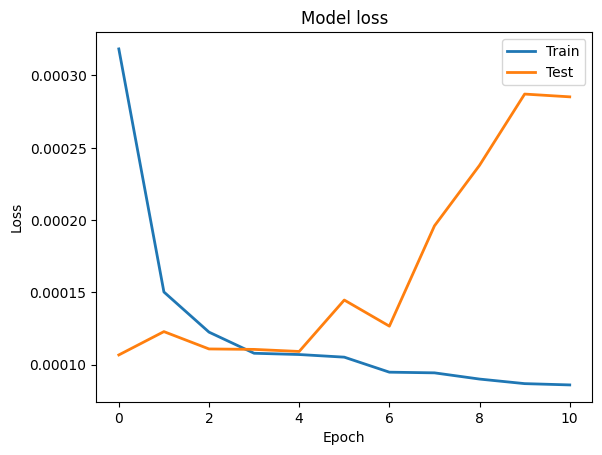

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
test_x_predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse.ravel(),
                        'True_class': y1Test.ravel()})
error_df.dropna(axis = 0)

2206/2206 [==============================] - 3s 1ms/step


,Reconstruction_error,True_class
10,0.000090,1.0
14,0.000030,0.0
18,0.000015,1.0
19,0.000007,1.0
40,0.000181,1.0
...,...,...
70554,0.000165,1.0
70559,0.000081,0.0
70560,0.000030,1.0
70561,0.000081,1.0


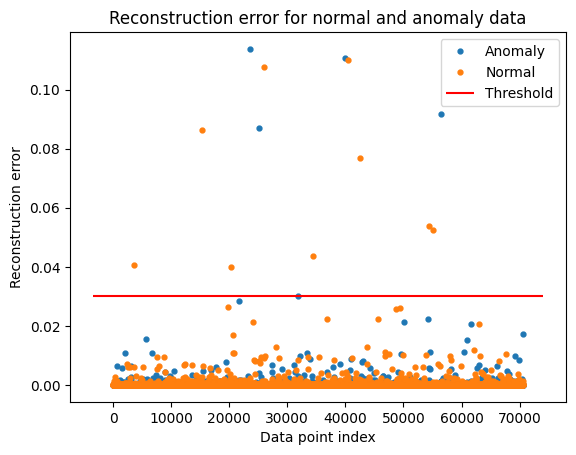

In [ ]:
threshold_fixed = .03
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Anomaly")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and anomaly data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
error_df.dropna()

,Reconstruction_error,True_class,pred
10,0.000090,1.0,0
14,0.000030,0.0,0
18,0.000015,1.0,0
19,0.000007,1.0,0
40,0.000181,1.0,0
...,...,...,...
70554,0.000165,1.0,0
70559,0.000081,0.0,0
70560,0.000030,1.0,0
70561,0.000081,1.0,0


<ipython-input-23-6b1bb5b03cb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['pred'] =pred_y


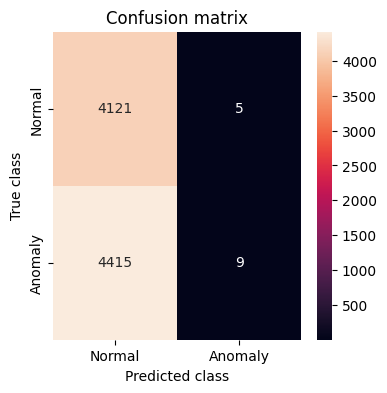

In [ ]:
threshold_fixed = .03
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
error_df = error_df.dropna(subset=['True_class'])
pred_y = [x for x in pred_y if not np.isnan(x)]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

 Accuracy:  0.4830409356725146
 Recall:  0.002034358047016275
 Precision:  0.6428571428571429
